In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings 
warnings.filterwarnings('ignore')

C:\Users\WIN10\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
tcs = pd.read_csv('C:/Users/WIN10/Downloads/TCS (1).csv',sep=',', parse_dates=['Date'], date_parser=dateparse)

In [3]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
tcs.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4282,2021-11-24,TCS,EQ,3464.25,3472.20,3493.05,3424.00,3431.95,3443.30,3469.80,2161746,7.500833e+14,163891.0,1640323,0.7588
4283,2021-11-25,TCS,EQ,3443.30,3443.90,3463.00,3434.05,3450.00,3445.90,3451.54,1849619,6.384030e+14,102359.0,1294556,0.6999
4284,2021-11-26,TCS,EQ,3445.90,3425.00,3490.00,3411.90,3439.20,3446.85,3454.40,1941251,6.705853e+14,156945.0,1152929,0.5939
4285,2021-11-29,TCS,EQ,3446.85,3447.15,3529.35,3406.45,3503.50,3502.00,3490.28,2981745,1.040713e+15,206893.0,1648719,0.5529
4286,2021-11-30,TCS,EQ,3502.00,3491.00,3563.75,3491.00,3535.00,3529.15,3535.48,5588446,1.975785e+15,208979.0,3849797,0.6889


In [5]:
tcs.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1684
Deliverable Volume       0
%Deliverble              0
dtype: int64

<AxesSubplot:>

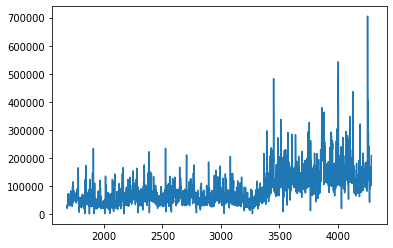

In [6]:
tcs.Trades.plot()

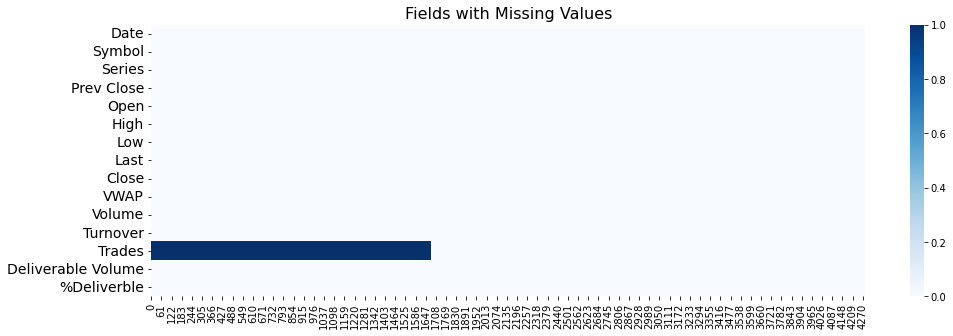

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(tcs.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [8]:
#droping some columns
tcs=tcs.drop(['Symbol','Series','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)

In [9]:
tcs.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332


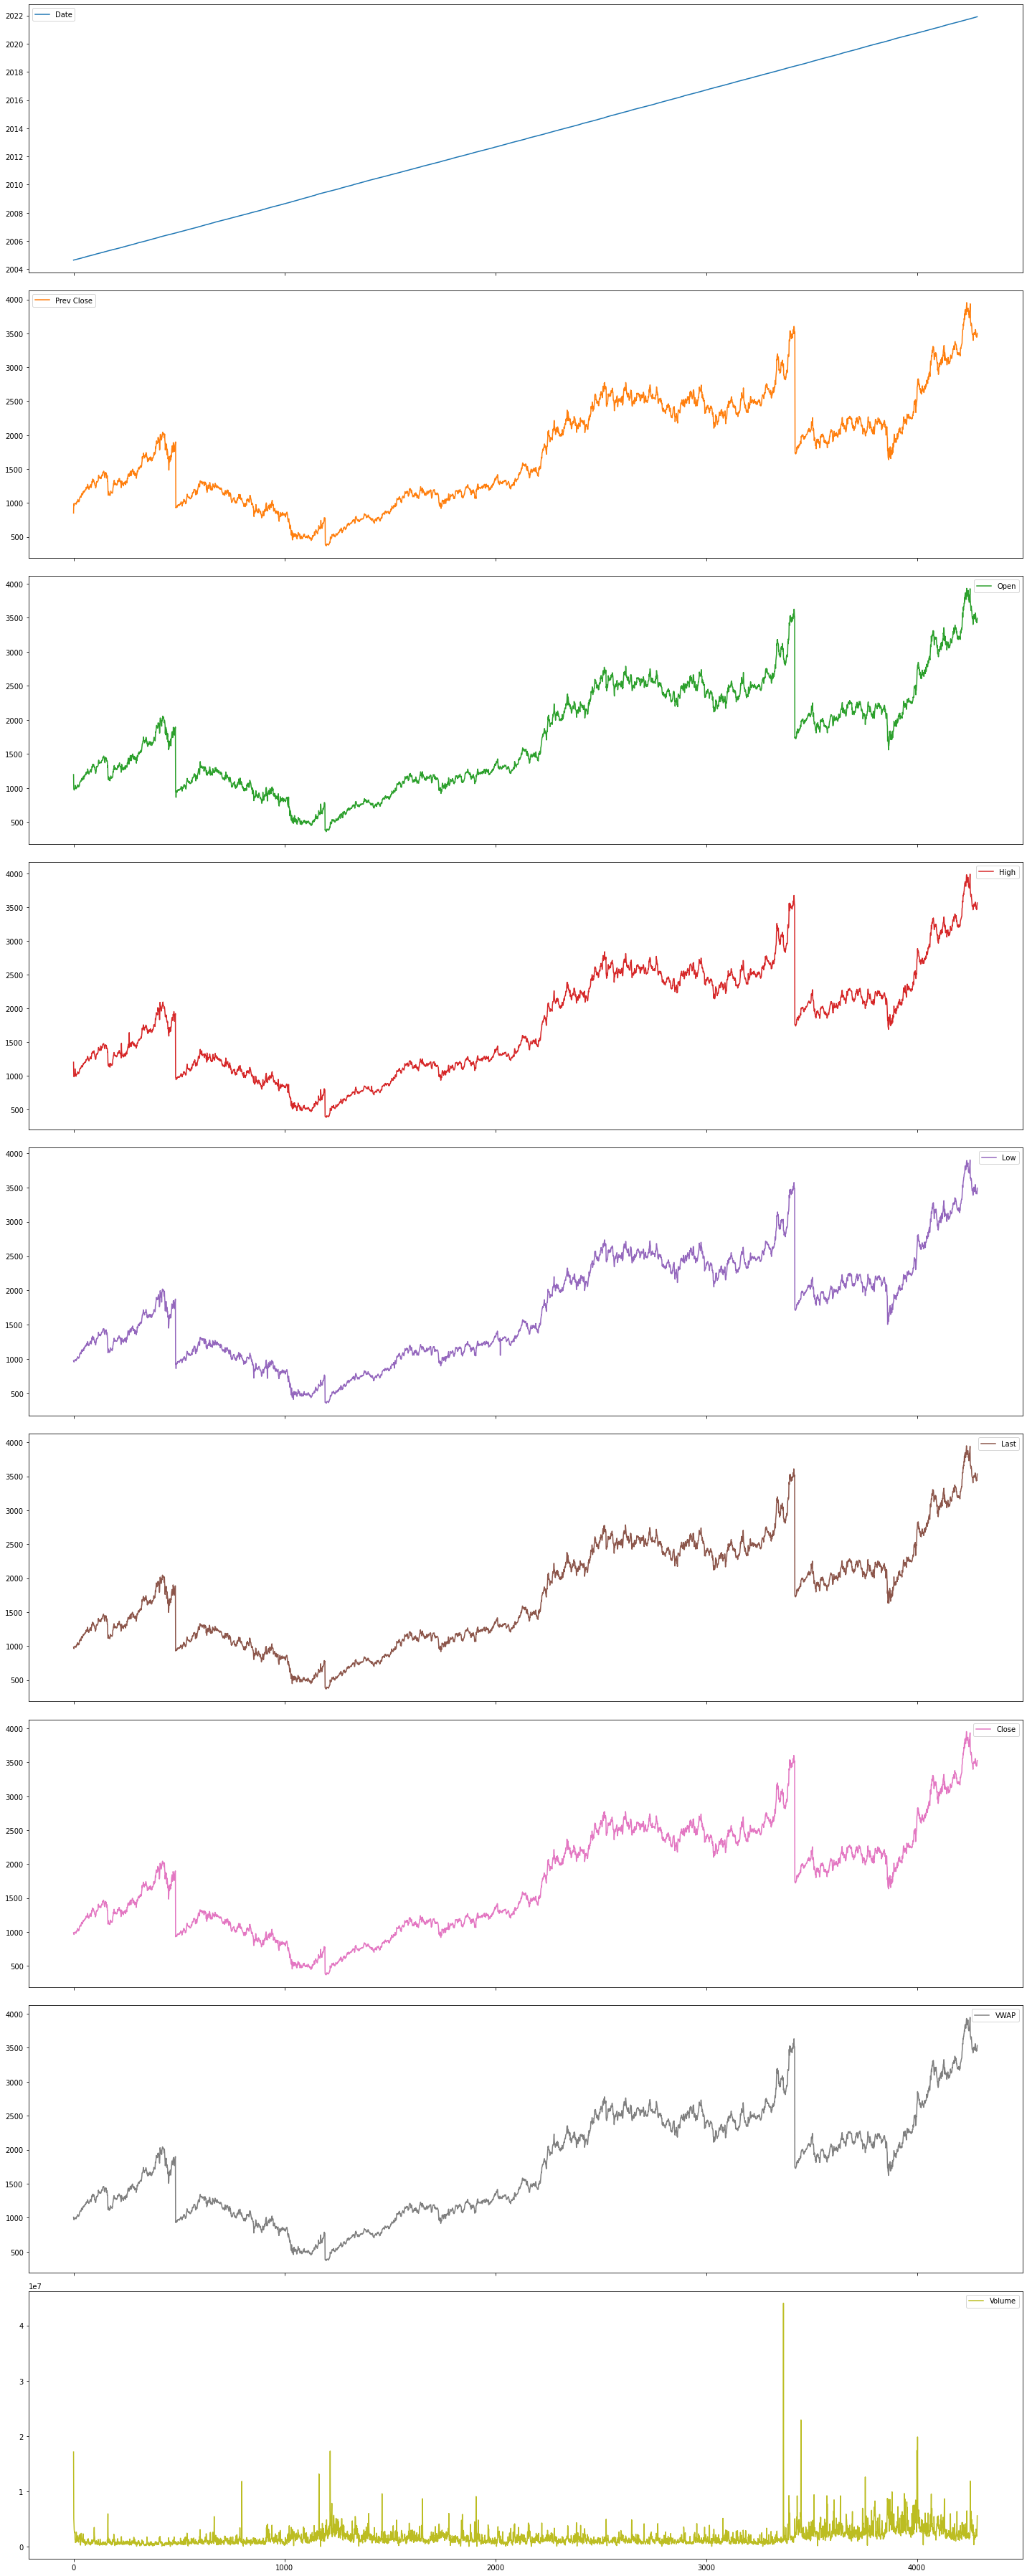

In [10]:
tcs.plot(figsize=(20,50),subplots=True)

plt.tight_layout()
plt.show()

In [11]:
# Sort values by timestamp (not necessary in this case)
tcs = tcs.sort_values(by='Date')

# Check time intervals
tcs['Time_Interval'] = tcs.Date - tcs.Date.shift(1)

tcs[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2004-08-25,NaT
1,2004-08-26,1 days
2,2004-08-27,1 days
3,2004-08-30,3 days
4,2004-08-31,1 days


In [12]:
print(f"{tcs['Time_Interval'].value_counts()}")
tcs = tcs.drop('Time_Interval', axis=1)

1 days    3260
3 days     789
2 days     134
4 days      90
5 days       9
0 days       3
6 days       1
Name: Time_Interval, dtype: int64


In [13]:
tcs

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332
...,...,...,...,...,...,...,...,...,...
4282,2021-11-24,3464.25,3472.20,3493.05,3424.00,3431.95,3443.30,3469.80,2161746
4283,2021-11-25,3443.30,3443.90,3463.00,3434.05,3450.00,3445.90,3451.54,1849619
4284,2021-11-26,3445.90,3425.00,3490.00,3411.90,3439.20,3446.85,3454.40,1941251
4285,2021-11-29,3446.85,3447.15,3529.35,3406.45,3503.50,3502.00,3490.28,2981745


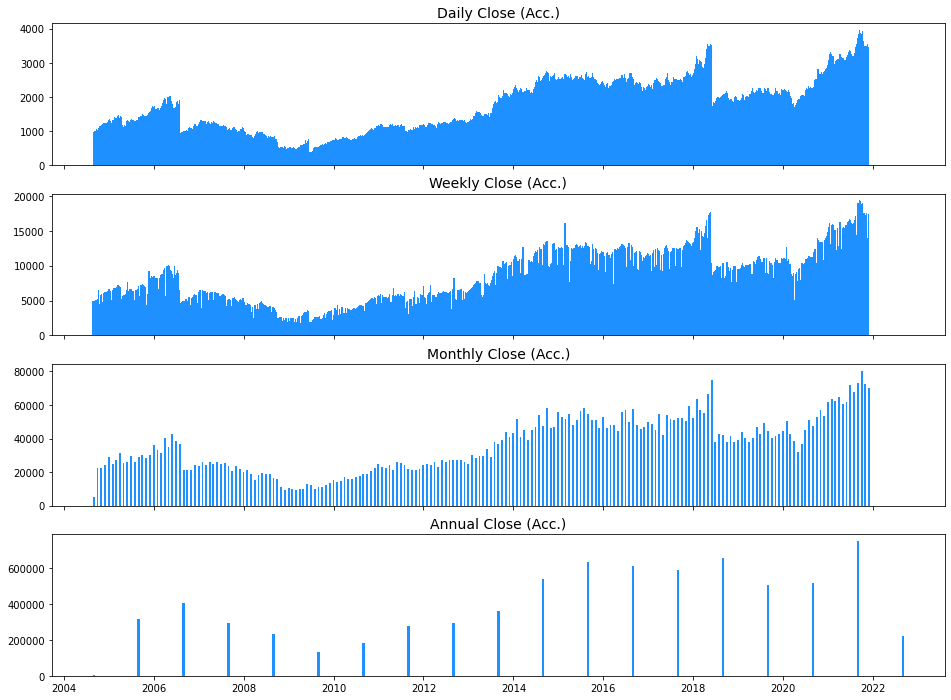

In [14]:
#resampling
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,12))

ax[0].bar(tcs.Date, tcs.Close, width=5, color='dodgerblue')
ax[0].set_title('Daily Close (Acc.)', fontsize=14)

resampled_df = tcs[['Date','Close']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1].bar(resampled_df.Date, resampled_df.Close, width=10, color='dodgerblue')
ax[1].set_title('Weekly Close (Acc.)', fontsize=14)

resampled_df = tcs[['Date','Close']].resample('M', on='Date').sum().reset_index(drop=False)
ax[2].bar(resampled_df.Date, resampled_df.Close, width=15, color='dodgerblue')
ax[2].set_title('Monthly Close (Acc.)', fontsize=14)

resampled_df = tcs[['Date','Close']].resample('12M', on='Date').sum().reset_index(drop=False)
ax[3].bar(resampled_df.Date, resampled_df.Close, width=20, color='dodgerblue')
ax[3].set_title('Annual Close (Acc.)', fontsize=14)



plt.show()

In [15]:
df_downsampled = tcs[['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP','Volume']].resample('7D', on='Date').mean().reset_index(drop=False)

df_downsampled['Close'] = tcs[['Date',
                                 'Close'
                                ]].resample('7D', on='Date').sum().reset_index(drop=False)[['Close']]

df = df_downsampled

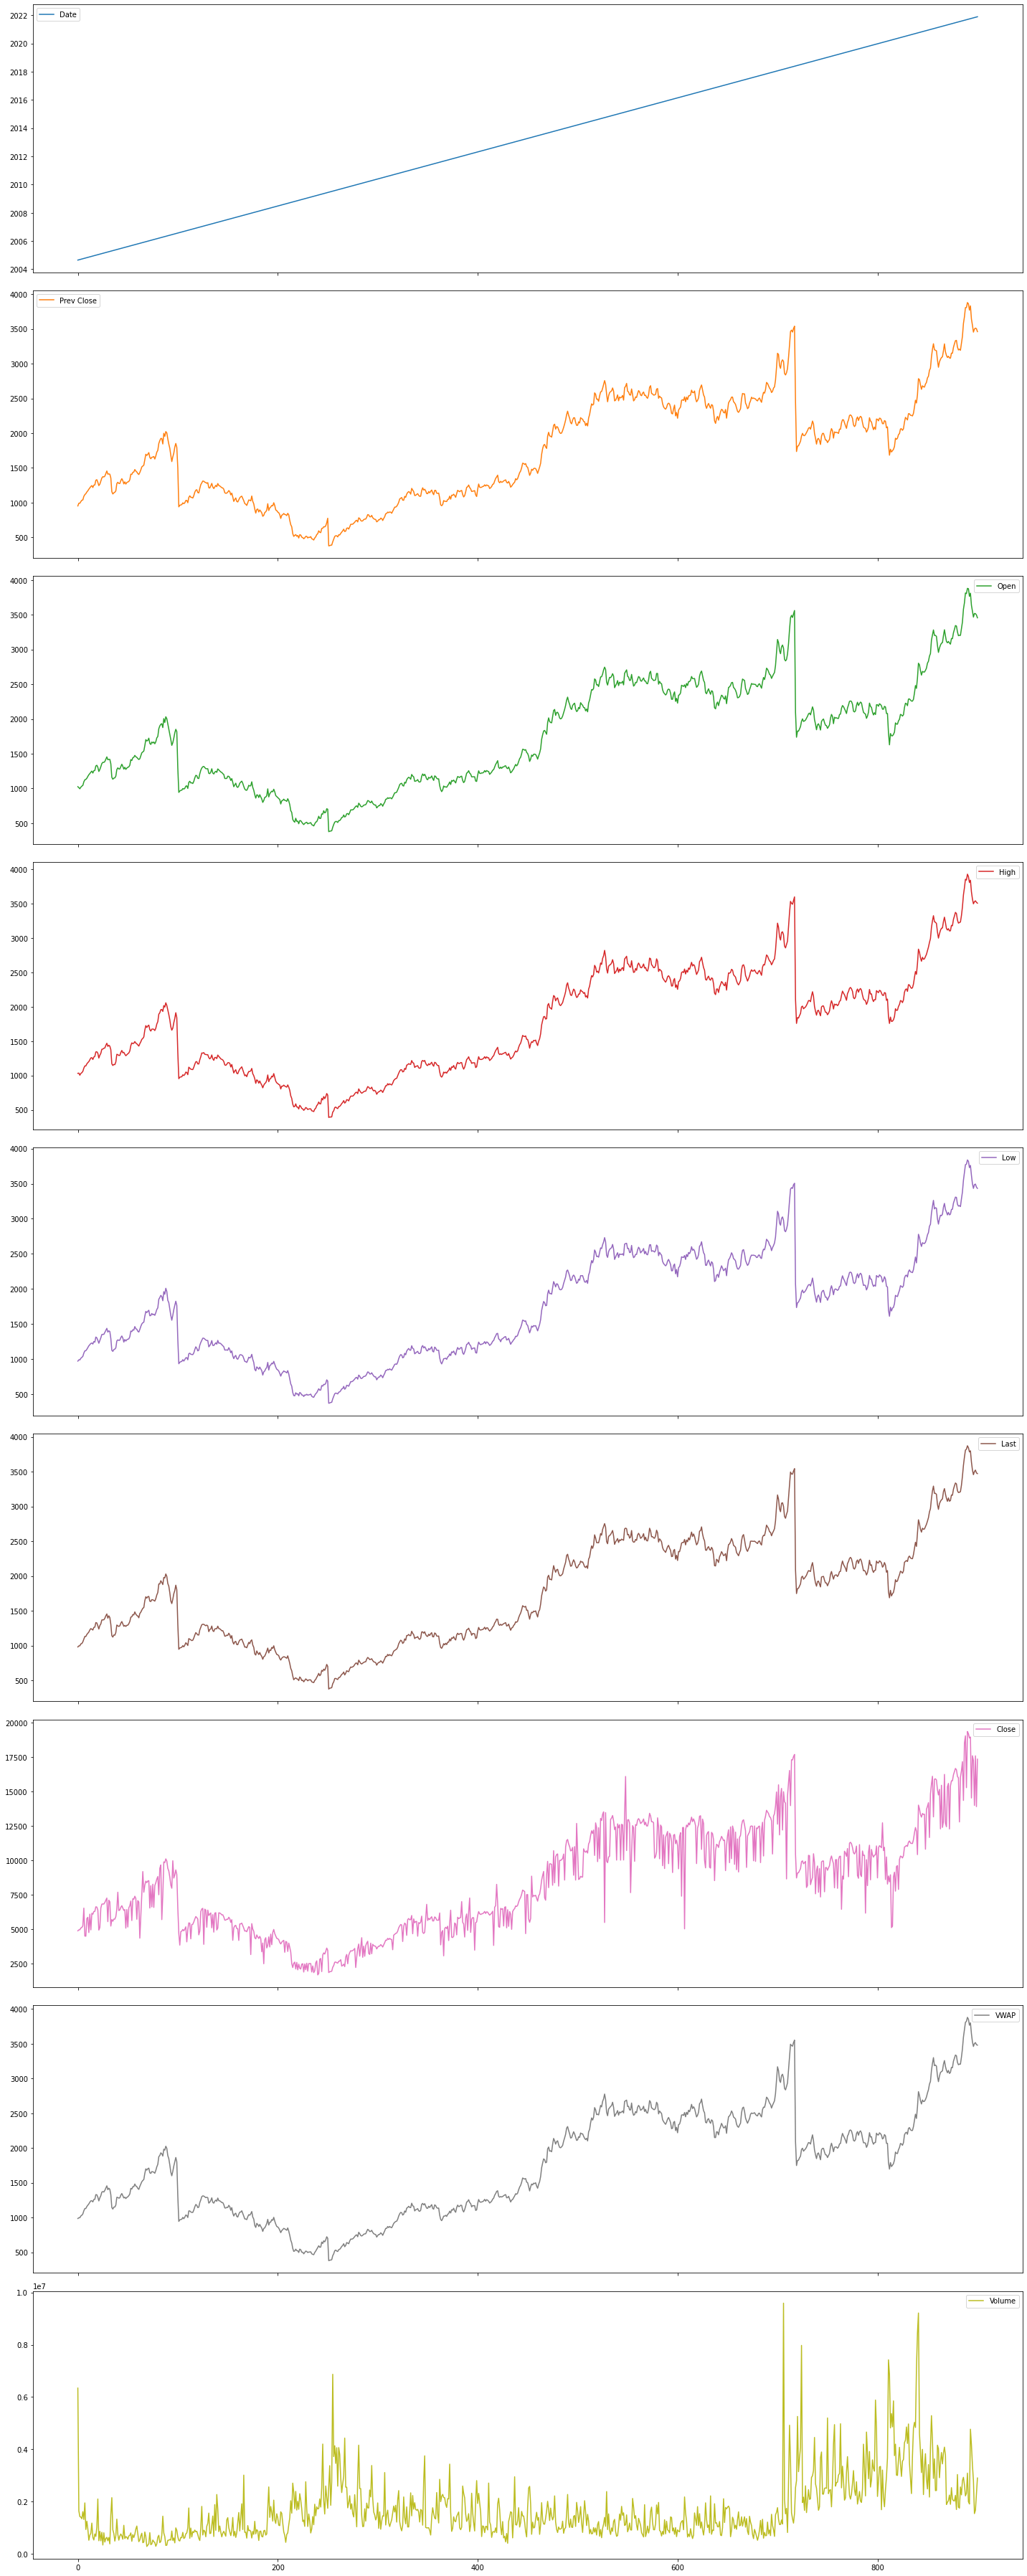

In [16]:
df.plot(figsize=(20,50),subplots=True)

plt.tight_layout()
plt.show()

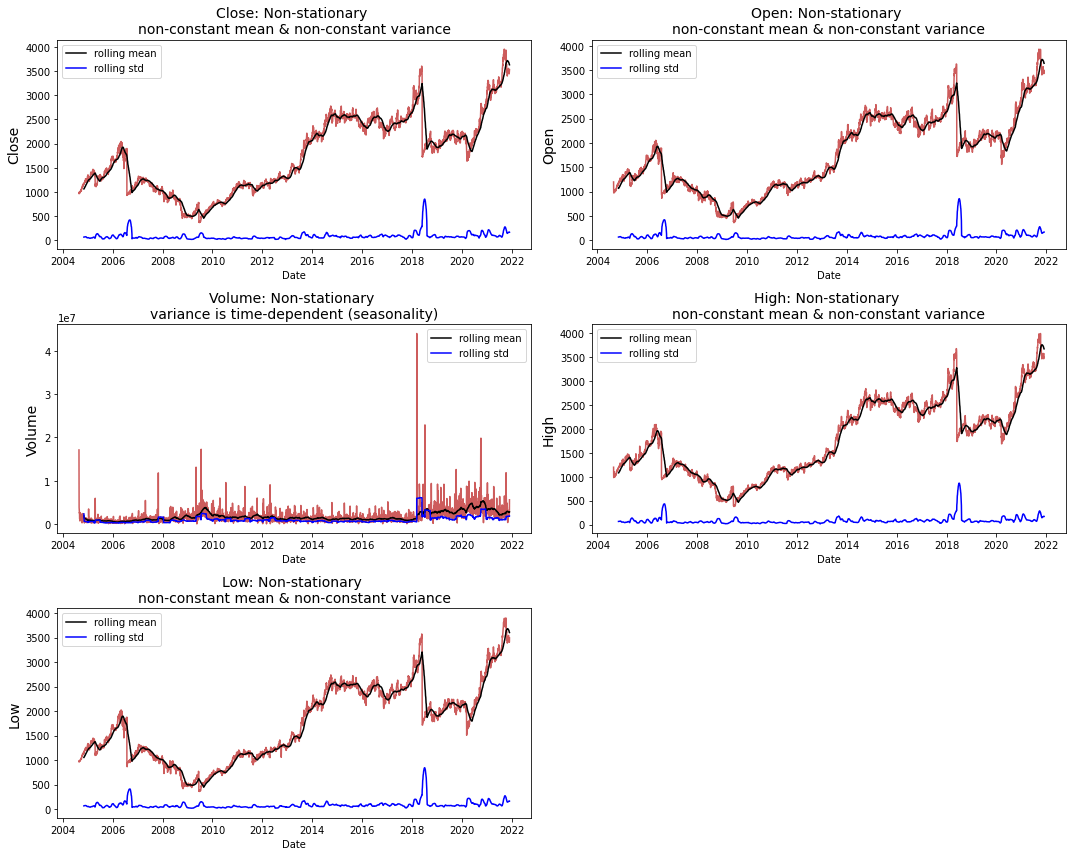

In [17]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

sns.lineplot(x=tcs.Date, y=tcs.Close, ax=ax[0, 0], color='indianred')
sns.lineplot(x=tcs.Date, y=tcs.Close.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=tcs.Date, y=tcs.Close.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Close: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Close', fontsize=14)

sns.lineplot(x=tcs.Date, y=tcs.Volume, ax=ax[1, 0], color='indianred')
sns.lineplot(x=tcs.Date, y=tcs.Volume.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=tcs.Date, y=tcs.Volume.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Volume: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=tcs.Date, y=tcs.Open, ax=ax[0, 1], color='indianred')
sns.lineplot(x=tcs.Date, y=tcs.Open.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=tcs.Date, y=tcs.Open.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Open: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Open', fontsize=14)

sns.lineplot(x=tcs.Date, y=tcs.High, ax=ax[1, 1], color='indianred')
sns.lineplot(x=tcs.Date, y=tcs.High.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=tcs.Date, y=tcs.High.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('High: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='High', fontsize=14)

sns.lineplot(x=tcs.Date, y=tcs.Low, ax=ax[2, 0], color='indianred')
sns.lineplot(x=tcs.Date, y=tcs.Low.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=tcs.Date, y=tcs.Low.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Low: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Low', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

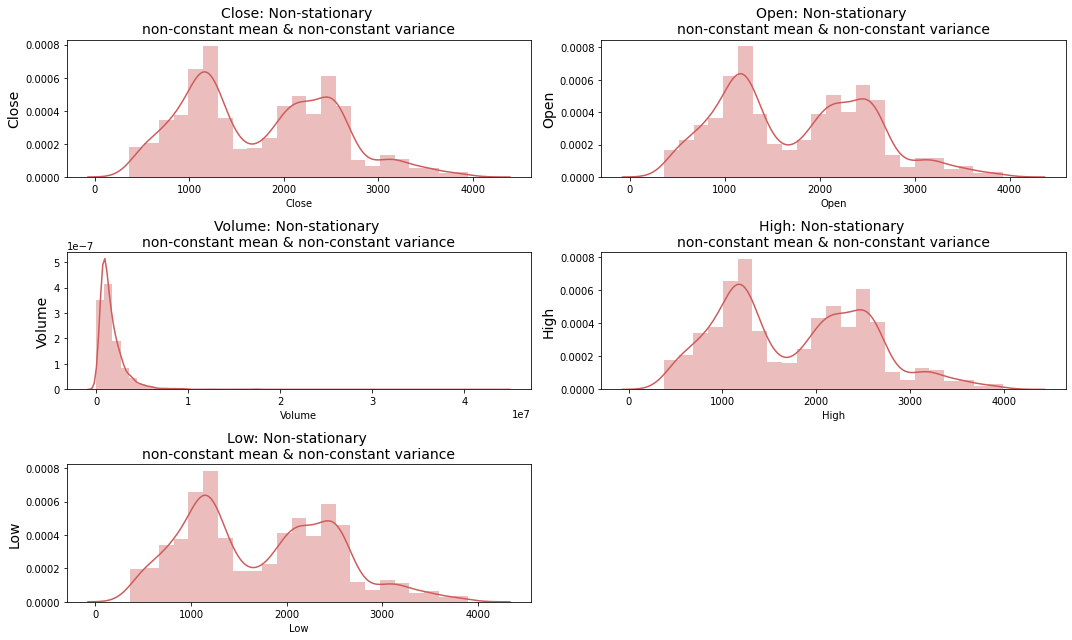

In [18]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

sns.distplot(tcs.Close.fillna(np.inf), ax=ax[0, 0], color='indianred')
ax[0, 0].set_title('Close: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Close', fontsize=14)

sns.distplot(tcs.Volume.fillna(np.inf), ax=ax[1, 0], color='indianred')
ax[1, 0].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Volume', fontsize=14)

sns.distplot(tcs.Open.fillna(np.inf), ax=ax[0, 1], color='indianred')
ax[0, 1].set_title('Open: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Open', fontsize=14)

sns.distplot(tcs.High.fillna(np.inf), ax=ax[1, 1], color='indianred')
ax[1, 1].set_title('High: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='High', fontsize=14)

sns.distplot(tcs.Low.fillna(np.inf), ax=ax[2, 0], color='indianred')
ax[2, 0].set_title('Low: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Low', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

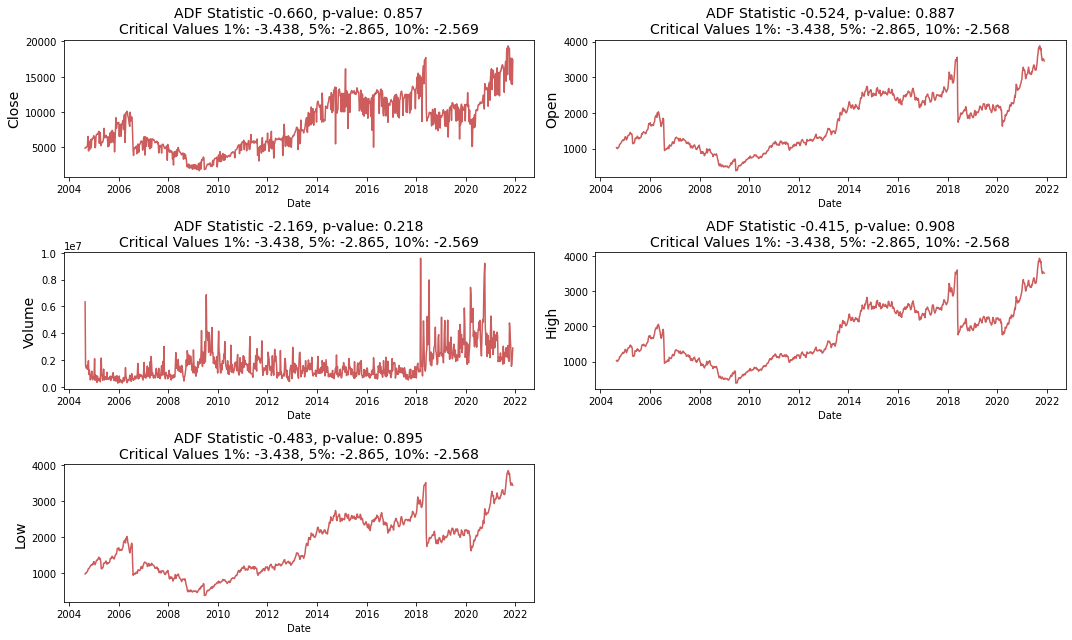

In [20]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.Date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.Close.values, 'Close', ax[0, 0])
visualize_adfuller_results(df.Volume.values, 'Volume', ax[1, 0])
visualize_adfuller_results(df.Open.values, 'Open', ax[0, 1])
visualize_adfuller_results(df.High.values, 'High', ax[1, 1])
visualize_adfuller_results(df.Low.values, 'Low', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [21]:
df['Close_log'] = np.log(abs(df.Close))

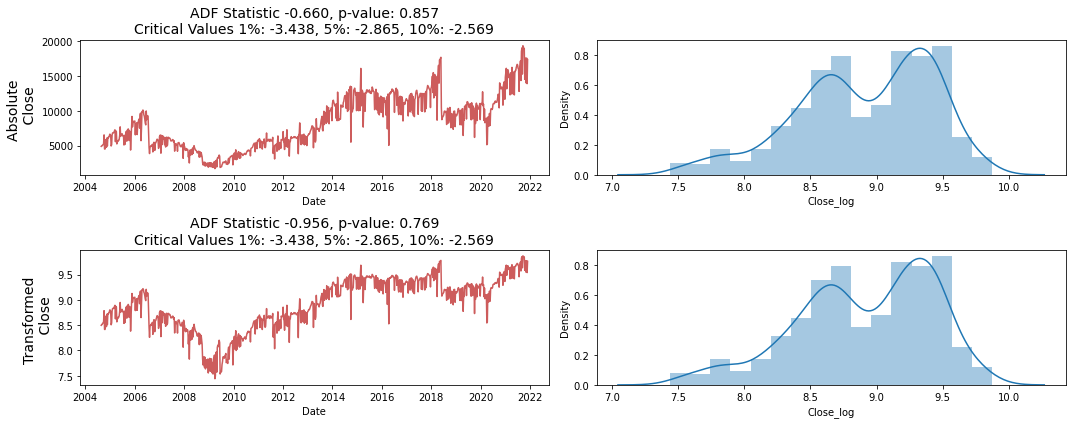

In [22]:
#adf for log
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results(abs(df.Close), 'Absolute \n Close', ax[0, 0])

sns.distplot(df.Close_log, ax=ax[0, 1])
visualize_adfuller_results(df.Close_log, 'Transformed \n Close', ax[1, 0])

sns.distplot(df.Close_log, ax=ax[1, 1])

plt.tight_layout()
plt.show()

In [23]:
# First Order Differencing
ts_diff = np.diff(df.Close)
df['Close_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.Close_diff_1)
df['Close_diff_2'] = np.append([0], ts_diff)

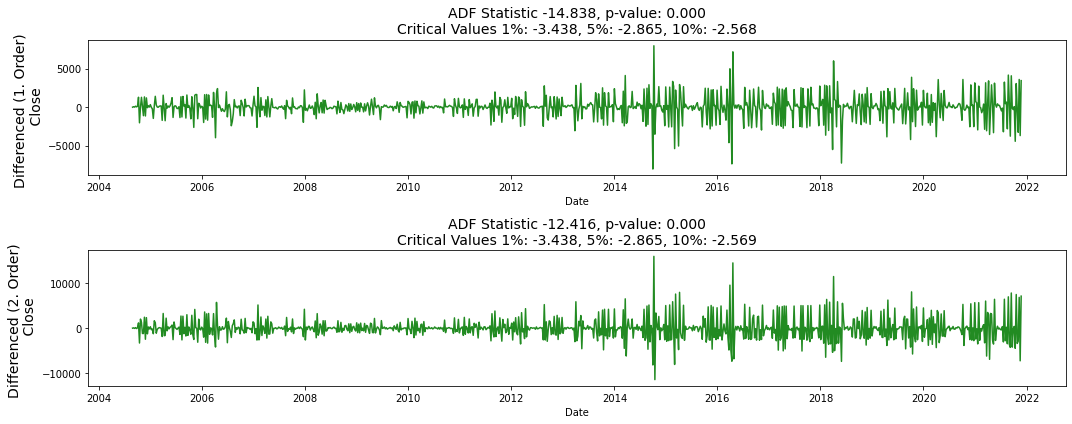

In [24]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df.Close_diff_1, 'Differenced (1. Order) \n Close', ax[0])
visualize_adfuller_results(df.Close_diff_2, 'Differenced (2. Order) \n Close', ax[1])
plt.tight_layout()
plt.show()

In [25]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df.month%12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,Date,year,month,day,day_of_year,week_of_year,quarter,season
0,2004-08-25,2004,8,25,238,35,3,3
1,2004-09-01,2004,9,1,245,36,3,4
2,2004-09-08,2004,9,8,252,37,3,4
3,2004-09-15,2004,9,15,259,38,3,4
4,2004-09-22,2004,9,22,266,39,3,4


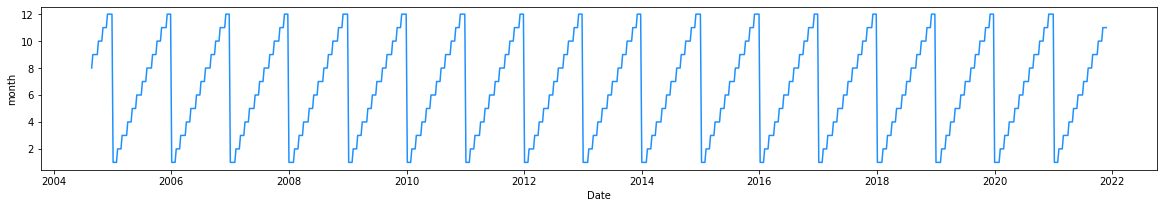

In [26]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.Date, y=df.month, color='dodgerblue')

plt.show()

In [27]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

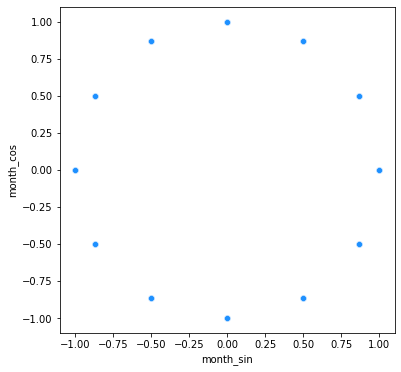

In [28]:
days_in_month = 30
df['day_sin'] = np.sin(2*np.pi*df.day/days_in_month)
df['day_cos'] = np.cos(2*np.pi*df.day/days_in_month)

days_in_year = 365
df['day_of_year_sin'] = np.sin(2*np.pi*df.day_of_year/days_in_year)
df['day_of_year_cos'] = np.cos(2*np.pi*df.day_of_year/days_in_year)

weeks_in_year = 52.1429
df['week_of_year_sin'] = np.sin(2*np.pi*df.week_of_year/weeks_in_year)
df['week_of_year_cos'] = np.cos(2*np.pi*df.week_of_year/weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()


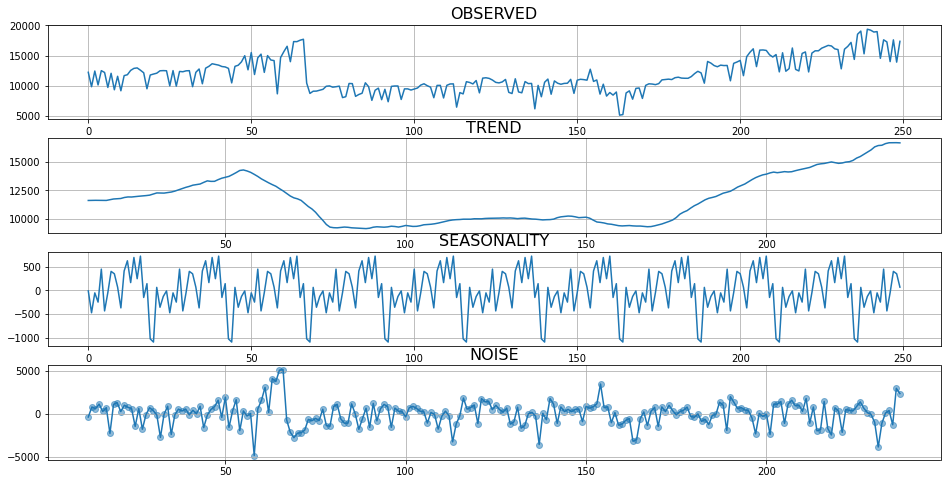

In [29]:
#Detrending the stochastic trend
from statsmodels.tsa.seasonal import seasonal_decompose
def checking(df,samples=250, period=24):
    if samples == 'all':
        res = seasonal_decompose(df['Close'].values, period=period)
    else:
        res = seasonal_decompose(df["Close"].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()
checking(df)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
core_columns =  ['Prev Close','Open','High','Low','Last','Close','VWAP','Volume']
for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [31]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

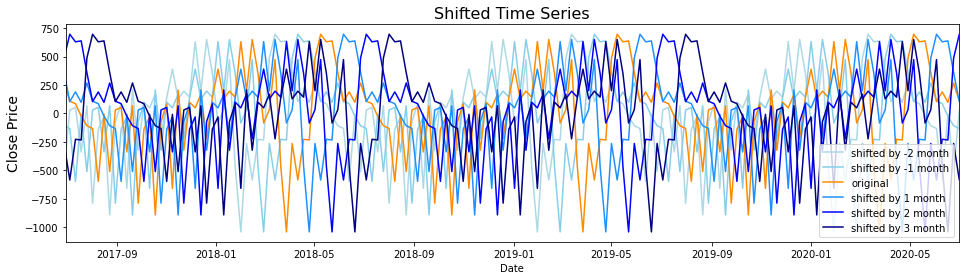

In [32]:
from datetime import date
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.Date, y=df.Close_seasonal_shift_b_2m, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.Date, y=df.Close_seasonal_shift_b_1m, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.Date, y=df.Close_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.Date, y=df.Close_seasonal_shift_1m, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.Date, y=df.Close_seasonal_shift_2m, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.Date, y=df.Close_seasonal_shift_3m, label='shifted by 3 month', ax=ax, color='navy')
ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2017, 6, 30), date(2020, 6, 30)])
ax.set_ylabel(ylabel='Close Price', fontsize=14)

plt.show()

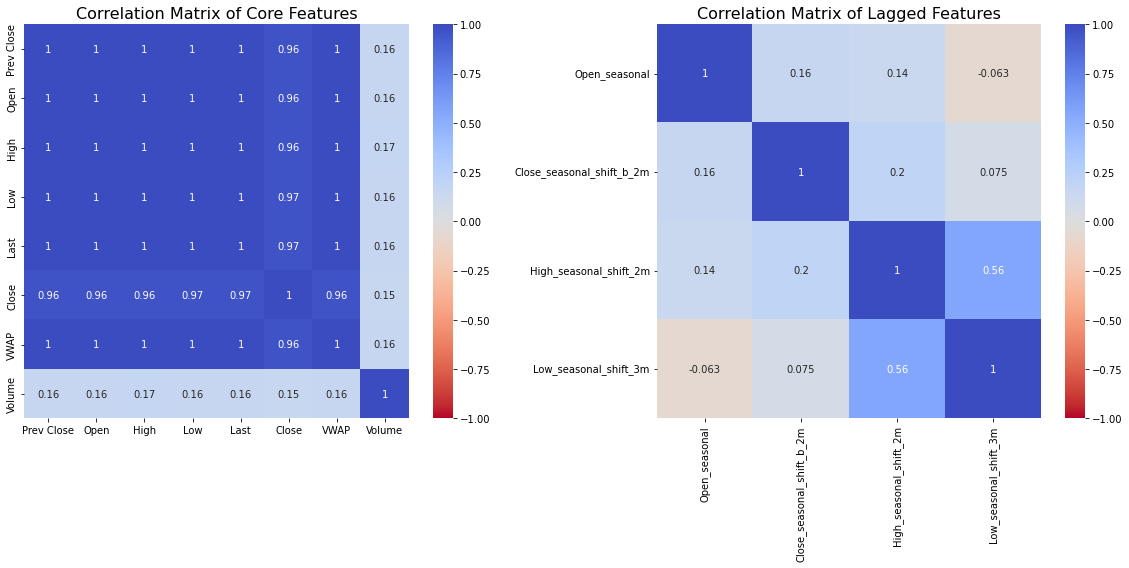

In [33]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'Open_seasonal',         
    'Close_seasonal_shift_b_2m',
    'High_seasonal_shift_2m', 
    'Low_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

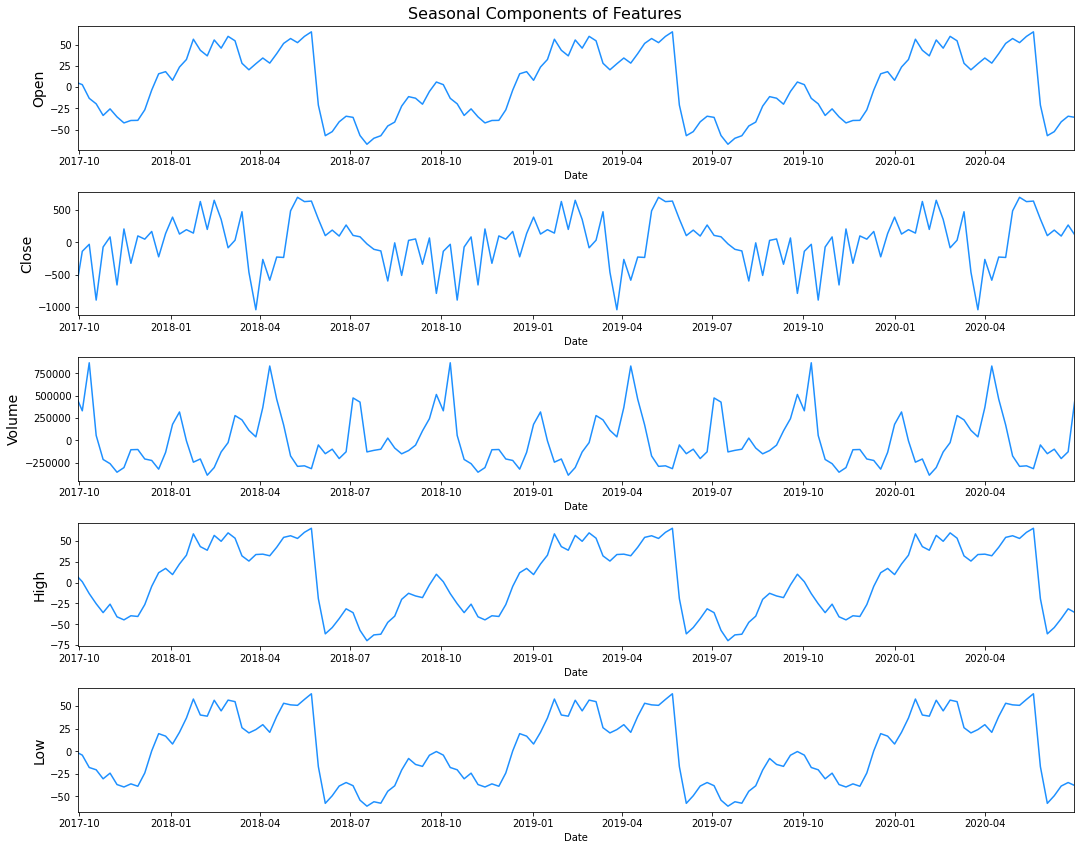

In [34]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.Date, y=df.Open_seasonal, ax=ax[0], color='dodgerblue')
ax[0].set_ylabel(ylabel='Open', fontsize=14)

sns.lineplot(x=df.Date, y=df.Close_seasonal, ax=ax[1], color='dodgerblue')
ax[1].set_ylabel(ylabel='Close', fontsize=14)

sns.lineplot(x=df.Date, y=df.Volume_seasonal, ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.High_seasonal, ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='High', fontsize=14)

sns.lineplot(x=df.Date, y=df.Low_seasonal, ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='Low', fontsize=14)

for i in range(5):
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

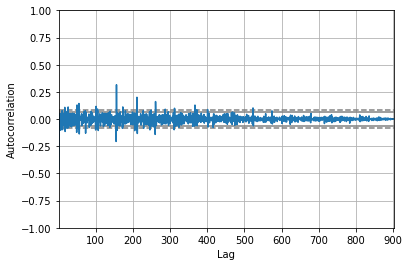

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Close_diff_1)
plt.show()

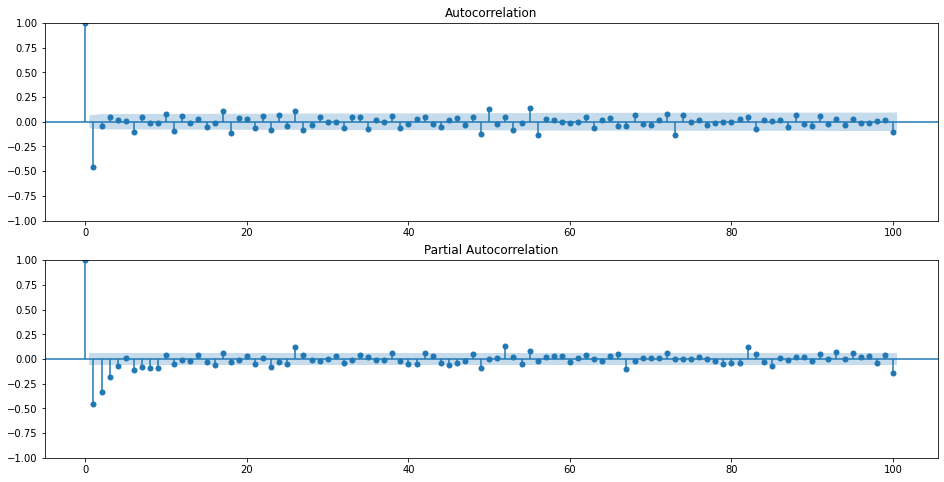

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Close_diff_1,lags=100, ax=ax[0])
plot_pacf(df.Close_diff_1,lags=100, ax=ax[1])
plt.show()

In [37]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.Date
y = df.Close

folds = TimeSeriesSplit(n_splits=N_SPLITS)

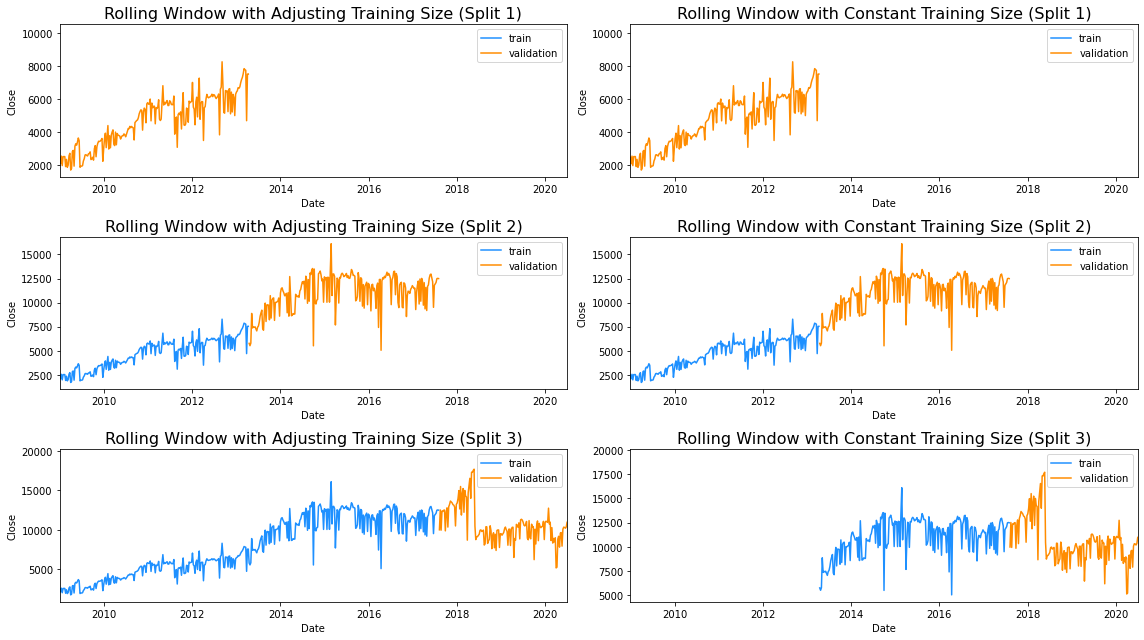

In [38]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.tight_layout()
plt.show()

In [39]:
df.tail(50)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Close_log,...,VWAP_seasonal_shift_b_2m,VWAP_seasonal_shift_b_1m,VWAP_seasonal_shift_1m,VWAP_seasonal_shift_2m,VWAP_seasonal_shift_3m,Volume_seasonal_shift_b_2m,Volume_seasonal_shift_b_1m,Volume_seasonal_shift_1m,Volume_seasonal_shift_2m,Volume_seasonal_shift_3m
851,2020-12-16,2819.0200,2830.6000,2868.3300,2803.0600,2838.2600,14206.05,2838.2820,3418446.60,9.561423,...,55.733239,35.912310,-38.127604,-33.570878,5.805926,-305664.120126,-6656.597807,-105960.975734,-215306.536724,513873.104370
852,2020-12-23,2905.0000,2903.7625,2935.5125,2892.6625,2920.8000,11678.00,2918.5575,2175319.25,9.365462,...,48.633442,58.549264,-40.315922,-25.447287,-2.314523,-131078.404082,-245627.947853,-103561.518419,-262357.519313,330492.164810
853,2020-12-30,2934.0500,2940.8000,2991.5400,2921.3100,2968.0600,14832.75,2957.6200,4054993.20,9.604593,...,58.263737,41.258540,-24.121145,-39.288334,-15.702603,-26245.577253,-209918.847787,-209812.895416,-358216.403843,869105.900232
854,2021-01-06,3094.9300,3134.2900,3152.4700,3078.8000,3113.3700,15556.50,3113.9000,5288615.80,9.652234,...,53.186402,39.593710,-1.008692,-42.091153,-24.942106,277208.369202,-391900.849991,-226376.596292,-306442.874956,53918.237069
855,2021-01-13,3207.9200,3209.6000,3250.6500,3175.2100,3222.5800,16125.45,3216.4220,4354535.20,9.688154,...,29.882683,55.733239,15.910595,-38.127604,-33.570878,228617.702988,-305664.120126,-324001.672658,-105960.975734,-215306.536724
856,2021-01-20,3286.6125,3281.4625,3325.4750,3262.4375,3292.3125,13177.05,3300.2775,2889334.50,9.486232,...,22.819912,48.633442,17.187327,-40.315922,-25.447287,111404.600349,-131078.404082,-135469.854304,-103561.518419,-262357.519313
857,2021-01-27,3199.9200,3202.8100,3237.4600,3140.9800,3187.5800,15911.75,3185.0200,3636788.40,9.674813,...,28.602131,58.263737,7.642058,-24.121145,-39.288334,38189.263744,-26245.577253,178445.628455,-209812.895416,-358216.403843
858,2021-02-03,3192.8000,3202.5000,3230.3000,3157.3600,3188.2000,15937.45,3193.3400,2422921.00,9.676427,...,30.619203,53.186402,21.142567,-1.008692,-42.091153,367470.843213,277208.369202,317573.569302,-226376.596292,-306442.874956
859,2021-02-10,3185.3700,3188.6400,3212.1700,3151.1800,3174.0500,15858.75,3178.7140,2427578.40,9.671477,...,26.355496,29.882683,35.912310,15.910595,-38.127604,832892.830929,228617.702988,-6656.597807,-324001.672658,-105960.975734
860,2021-02-17,3053.9100,3058.8200,3088.3800,3000.7700,3029.4100,15140.95,3035.6420,4158577.60,9.625158,...,39.672445,22.819912,58.549264,17.187327,-40.315922,461212.175217,111404.600349,-245627.947853,-135469.854304,-103561.518419


In [40]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'Close'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 64

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

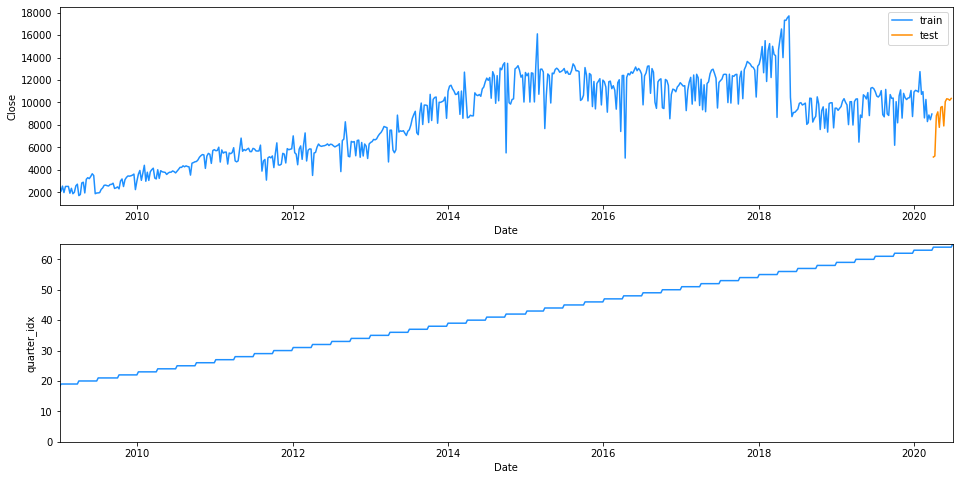

In [41]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [42]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.Date, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    #ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Close', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    #ax[1].set_ylim([0, 4])   
    plt.show()

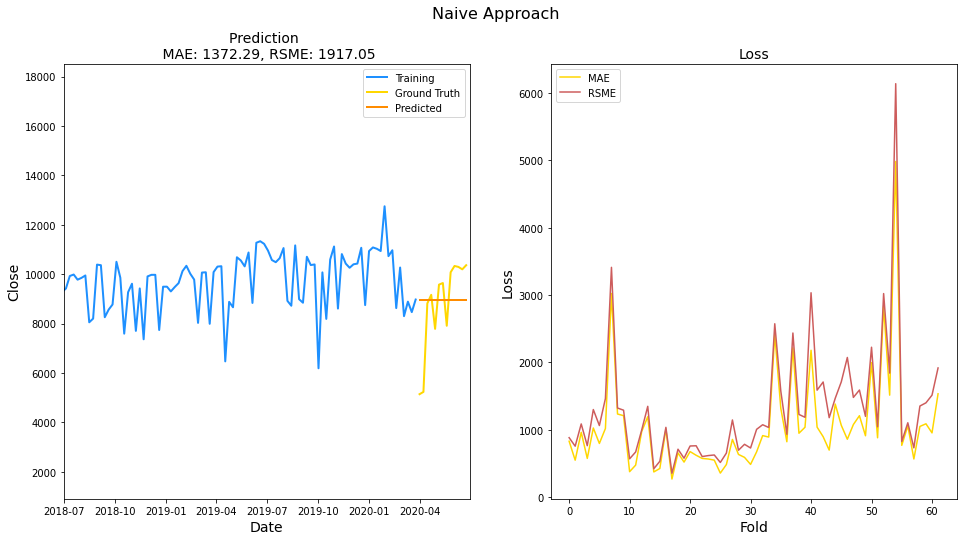

In [43]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

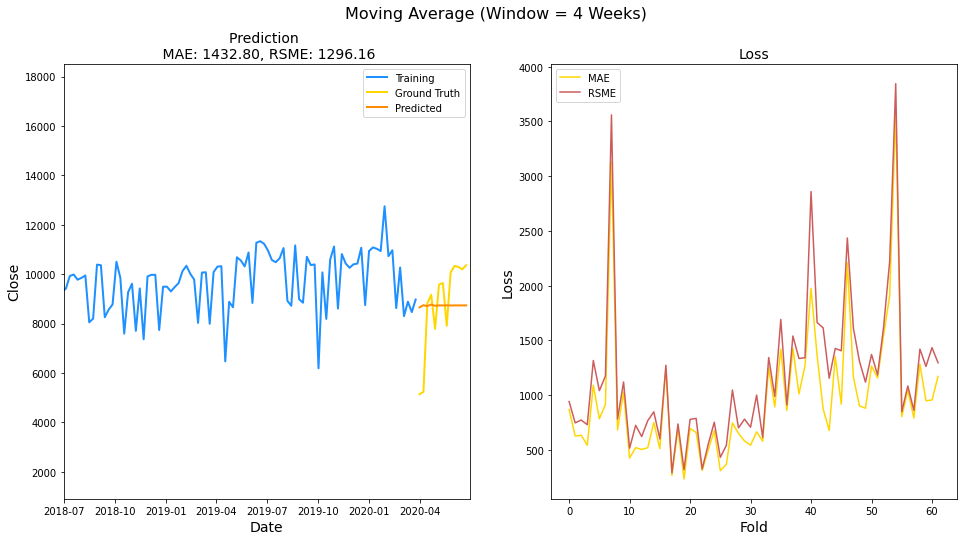

In [44]:

score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Weeks)')

C:\Users\WIN10\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


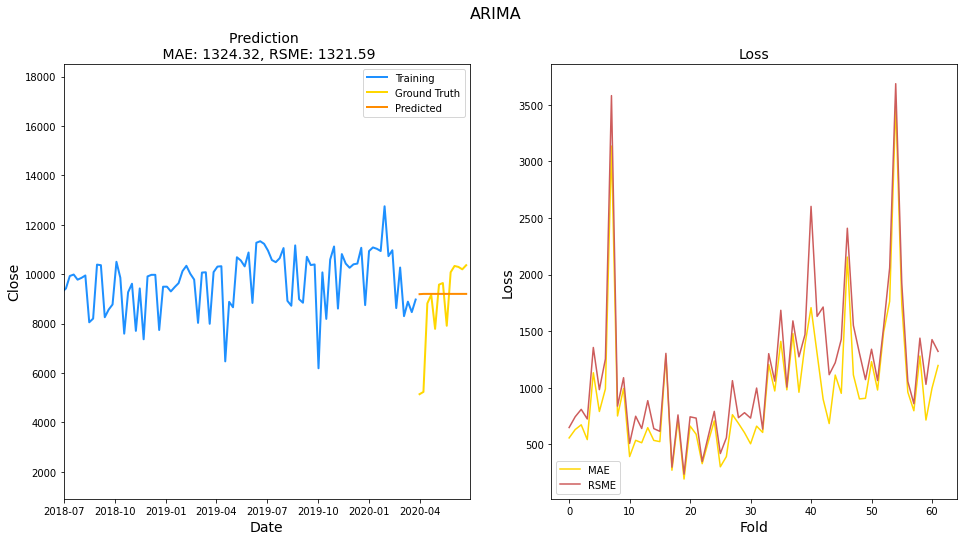

In [45]:
from statsmodels.tsa.arima.model import ARIMA

score_mae = []
score_rsme = []

for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = ARIMA(y_train, order=(1,1,1))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.predict(valid_index[0], valid_index[-1])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))


# Fit model with Vector Auto Regression (VAR)
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.predict(y.index[-1]+1, y.index[-1] + len(y_test)).reset_index(drop=True)
plot_approach_evaluation(y_pred, score_mae, score_rsme, 'ARIMA')